## Multiple linear regression
Purpose of this training is learning library usage for multiple linear regression. 
Dataset is built on IPO prosepcts, Crunchbase data, Yahoo finance data for Master's degree research

In [18]:
import pandas as pd
import numpy as np
df = pd.read_excel('mair_regression.xlsx', index_col='Company')
display(df.head(11)) 

,MAIR,VL,FR,OPCFP,NI
Company,,,,,
Yandex,0.10,11200000000,5,1,1
Groupon,0.23,12708067040,6,1,0
Zynga,-0.06,6990000000,9,1,1
Facebook,0.02,83500000000,15,1,1
Workday,0.43,4500000000,6,0,0
FireEye,0.45,2349416980,5,1,0
Twitter,0.44,24565826402,12,0,0
Quotient Technology,0.46,1170716912,9,0,0
GoPro,0.24,2955000000,3,1,1


MAIR - Market Adjusted Initial Return. It is return on the first traiding day adjusted to market benchmark return for similar day. VL - valuation of the company. FR - funding rounds before IPO. OPCFP - operation cashflow (1 for positive, 0 for negative). NI - Net Income (1 for profitable companies, 0 for companies with losses) 

In [19]:
df.describe()

,MAIR,VL,FR,OPCFP,NI
count,75.000000,7.500000e+01,75.000000,75.000000,75.000000
mean,0.188533,7.136725e+09,7.453333,0.320000,0.213333
std,0.235014,1.398149e+10,4.275301,0.469617,0.412420
min,-0.440000,1.000000e+09,1.000000,0.000000,0.000000
25%,0.020000,1.662007e+09,5.000000,0.000000,0.000000
50%,0.240000,2.500000e+09,6.000000,0.000000,0.000000
75%,0.355000,6.200000e+09,9.000000,1.000000,0.000000
max,0.620000,8.350000e+10,24.000000,1.000000,1.000000


In [20]:
#Using log for VL to normalize values
df['VL'] = np.log10(df['VL'])
df

,MAIR,VL,FR,OPCFP,NI
Company,,,,,
Yandex,0.10,10.049218,5,1,1
Groupon,0.23,10.104079,6,1,0
Zynga,-0.06,9.844477,9,1,1
Facebook,0.02,10.921686,15,1,1
Workday,0.43,9.653213,6,0,0
...,...,...,...,...,...
Cloudflare,0.17,9.643453,6,0,1
Peloton,-0.12,9.908485,8,0,0
Vir Biotechnology,-0.44,9.339650,3,0,0


## Requirements for multiple linear regression. 
* Multicollinearity.
It is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences. We shouldn't have correlation between two variable more than +-0.7

* Homoscedasticity.
Homoscedasticity is a property of regression, which lies in the fact that all random errors along the regression line have a constant variance. If this condition is violated, then heteroscedasticity takes place. Violation of the homoscedasticity condition leads to difficulty in interpreting the results of the study of the influence of factors on the dependent variable. Homoscedasticity can be checked with White

<AxesSubplot:>

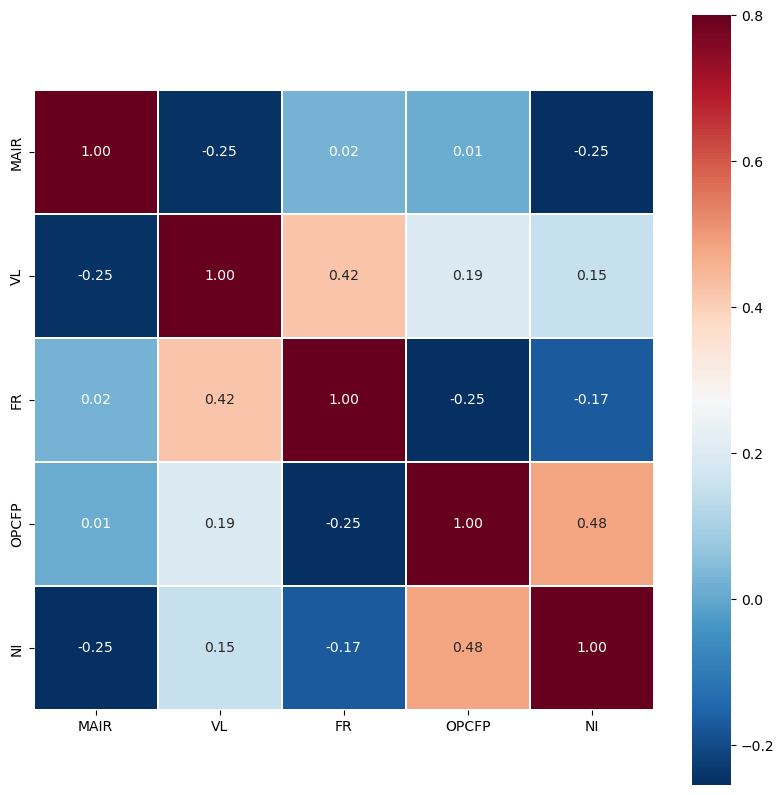

In [21]:
import seaborn as sns
from matplotlib import pyplot as plt
correlation_matrix = df.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, vmax = 0.8, cmap = 'RdBu_r', annot = True, fmt = '.2f', square = True,
            annot_kws = {'size':10}, linecolor = 'white', linewidths = 0.1)

We see strong correlation between channels. I am going to build different models including them in different ones to check which one is more important for model.

In [22]:
df.columns

Index(['MAIR', 'VL', 'FR', 'OPCFP', 'NI'], dtype='object')

In [23]:
x = df[['VL', 'FR', 'OPCFP', 'NI']]
y = df['MAIR']

In [28]:
import statsmodels.api as sm

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MAIR   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     3.454
Date:                Sun, 25 Dec 2022   Prob (F-statistic):             0.0124
Time:                        18:03:29   Log-Likelihood:                 9.4453
No. Observations:                  75   AIC:                            -8.891
Df Residuals:                      70   BIC:                             2.697
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8140      0.639      2.839      0.0

Looking at P value for variables we see that Organic channel is least important factor, we are going to drop it to see how it improves model. We are going to repeat the process removing variables one by one.

After removing unsignificant variables we have left with two. Though we can't call it a model, but we see that those two factors are important. (R squared metric is really low, but ignoring for purpose of training). 

In [39]:
from statsmodels.stats.diagnostic import het_white
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 49.913703553172375, 'Test Statistic p-value': 8.334514015661694e-11, 'F-Statistic': 16.696608730999635, 'F-Test p-value': 8.005203906999662e-11}


P value is less than 0,05 it means we have heteroscedacity 